In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace import sarimax
from statsmodels.tsa import seasonal
from statsmodels.graphics import gofplots
import datetime

In [2]:
df1 = pd.read_csv(r"C:\Users\Choi\Desktop\Dataset\Time_project\USA\M1.csv")
df2 = pd.read_csv(r"C:\Users\Choi\Desktop\Dataset\Time_project\KOR\M1.csv")
df1_date = df1.set_index("DATE")
df2_date = df2.set_index("Date")

In [3]:
m1_us = df1.M1_PCH

In [4]:
m1_kor = df2.P_change

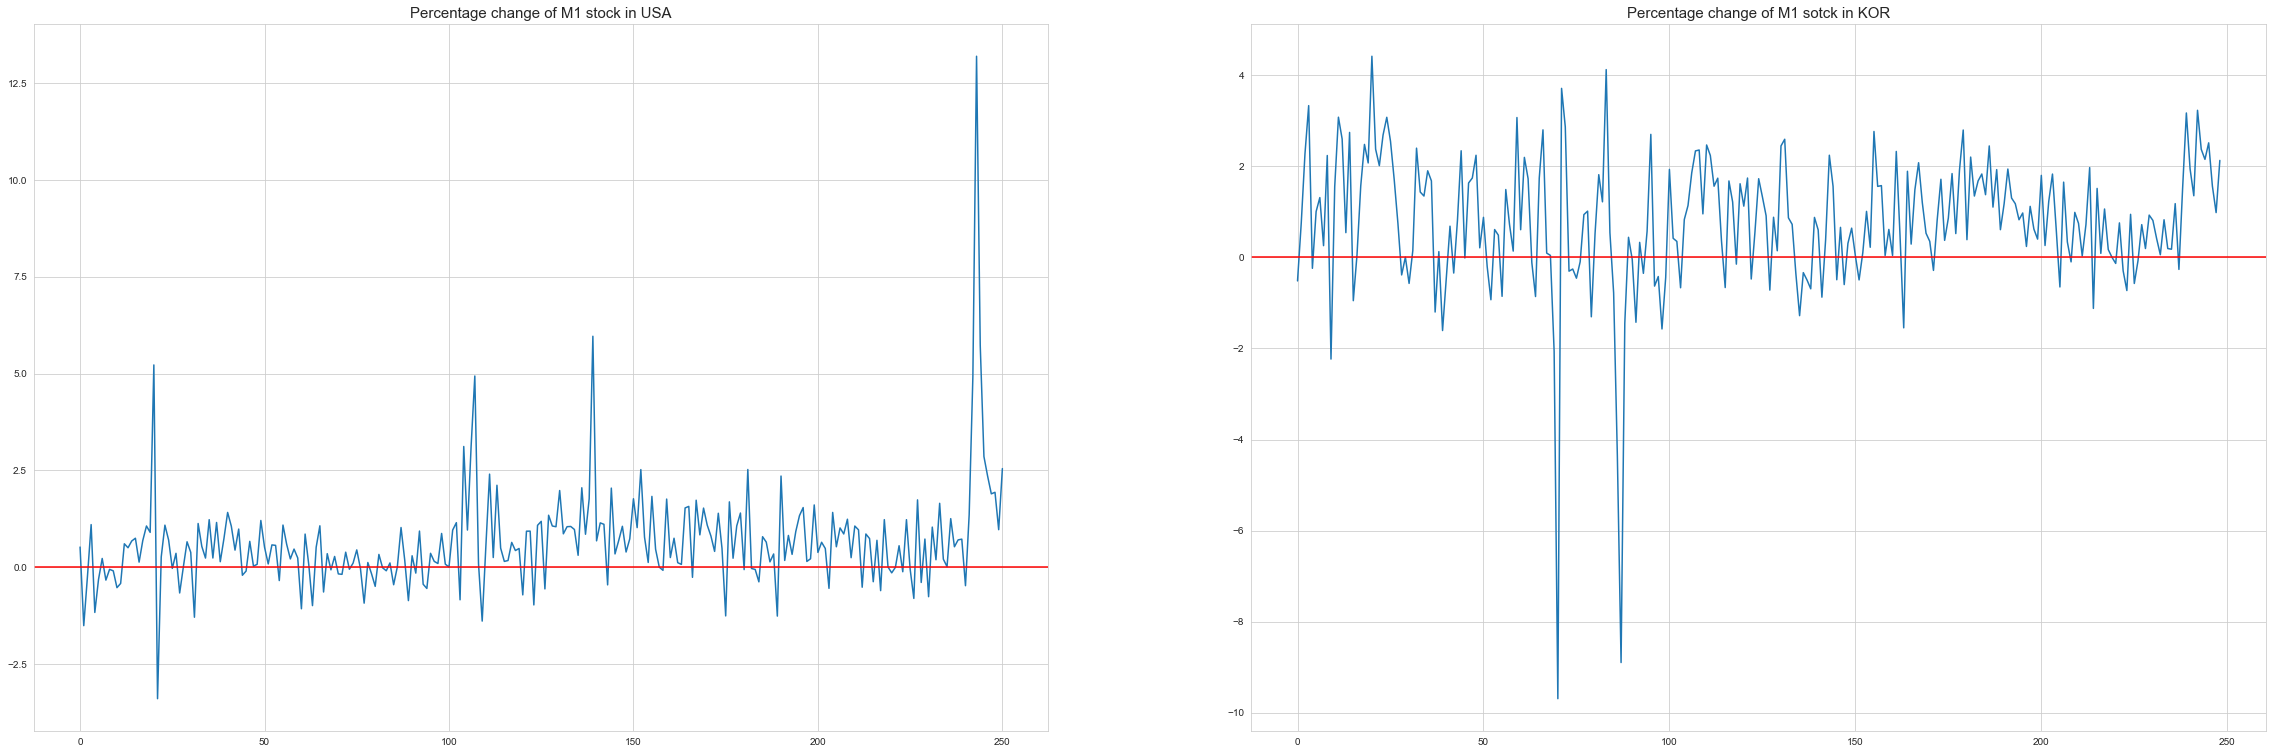

In [5]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(40,13))

ax = fig.subplots(1,2)
ax[0].plot(m1_us)
ax[0].set_title("Percentage change of M1 stock in USA",fontsize=15)
ax[0].axhline(y=0, color='r')
ax[1].plot(m1_kor)
ax[1].set_title("Percentage change of M1 sotck in KOR",fontsize=15)
ax[1].axhline(y=0, color='r')

In [6]:
m1_us_diff = m1_us.diff(periods=1)[1:]
m1_kor_diff = m1_kor.diff(periods=1)[1:]


m1_us_diff

1     -2.02995
2      1.26761
3      1.34209
4     -2.26834
5      0.85127
        ...   
246   -0.50649
247   -0.45677
248    0.03964
249   -0.96537
250    1.57770
Name: M1_PCH, Length: 250, dtype: float64

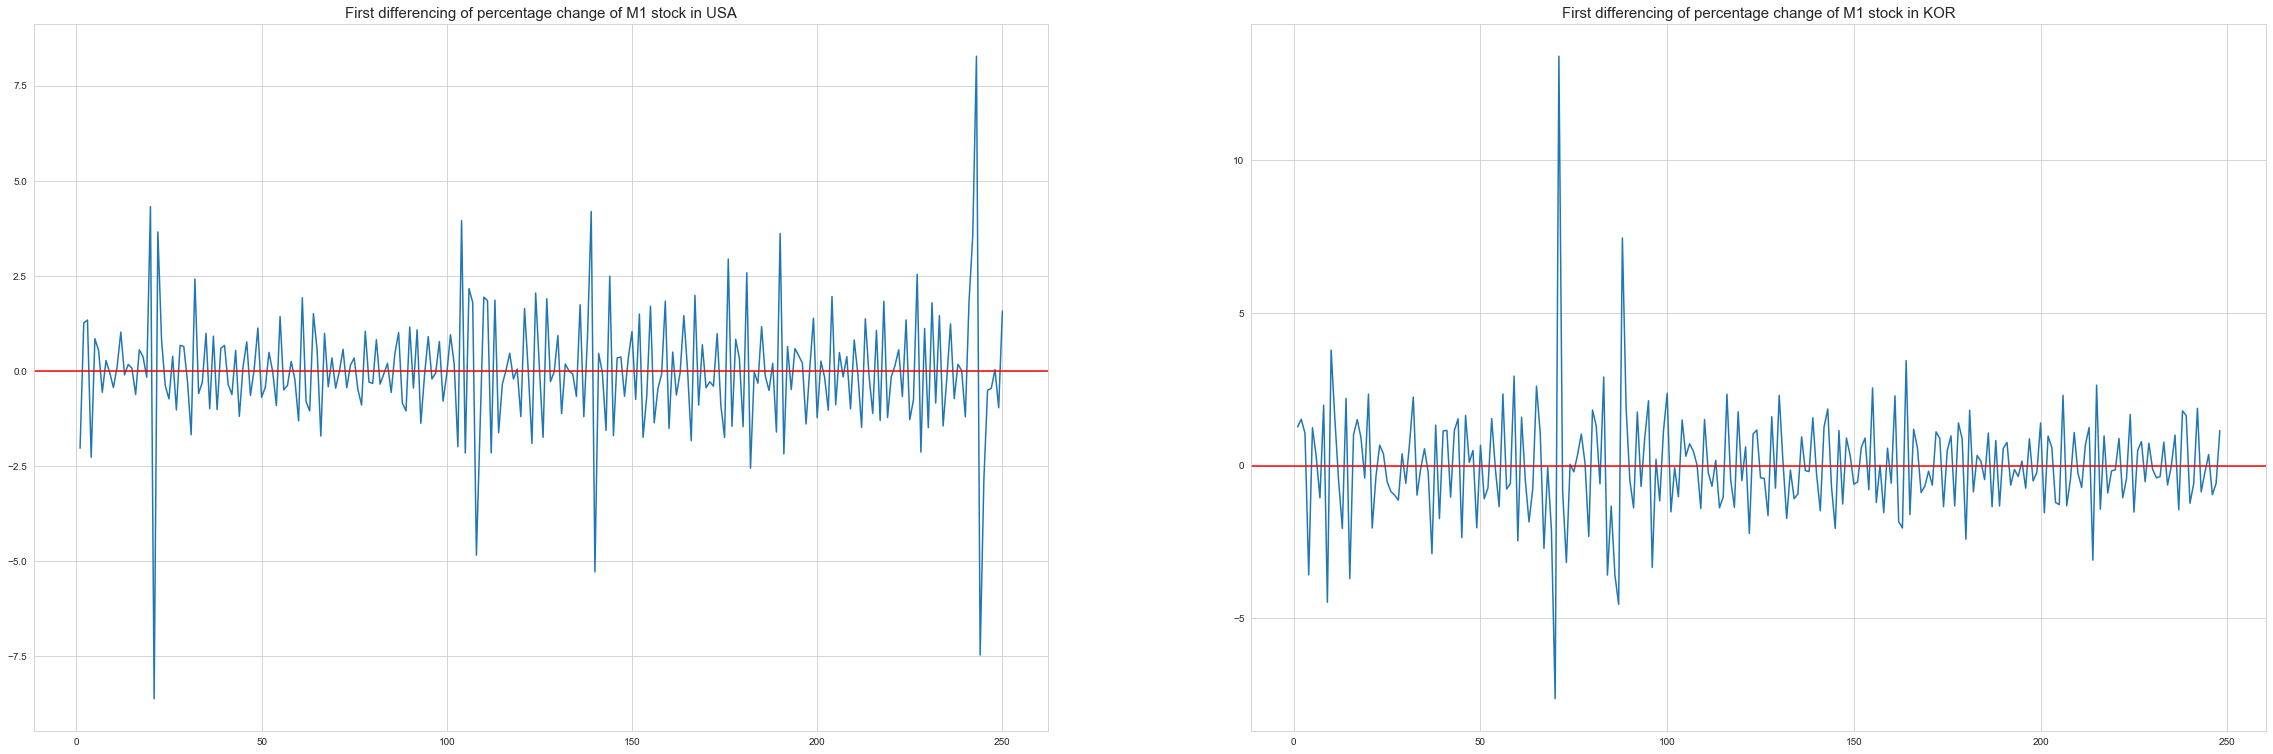

In [7]:
fig = plt.figure(figsize=(40,13))

ax = fig.subplots(1,2)
ax[0].plot(m1_us_diff)
ax[0].set_title("First differencing of percentage change of M1 stock in USA",fontsize=15)
ax[0].axhline(y=0, color='r')
ax[1].plot(m1_kor_diff)
ax[1].set_title("First differencing of percentage change of M1 stock in KOR",fontsize=15)
ax[1].axhline(y=0, color='r')

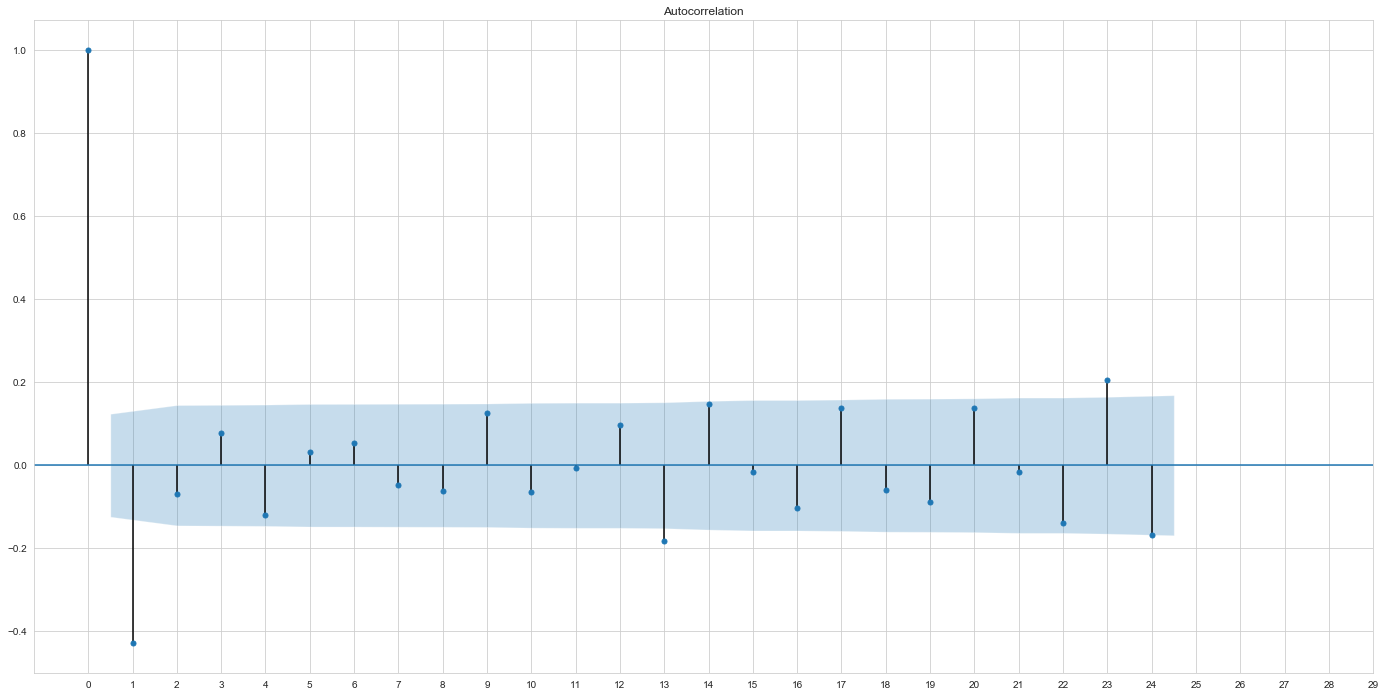

In [8]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(24,12))
ax = fig.subplots(1,1)
plot_acf(m1_us_diff,alpha=0.05,zero=True,ax=ax)
ax.set_xticks(np.arange(0,30,1))

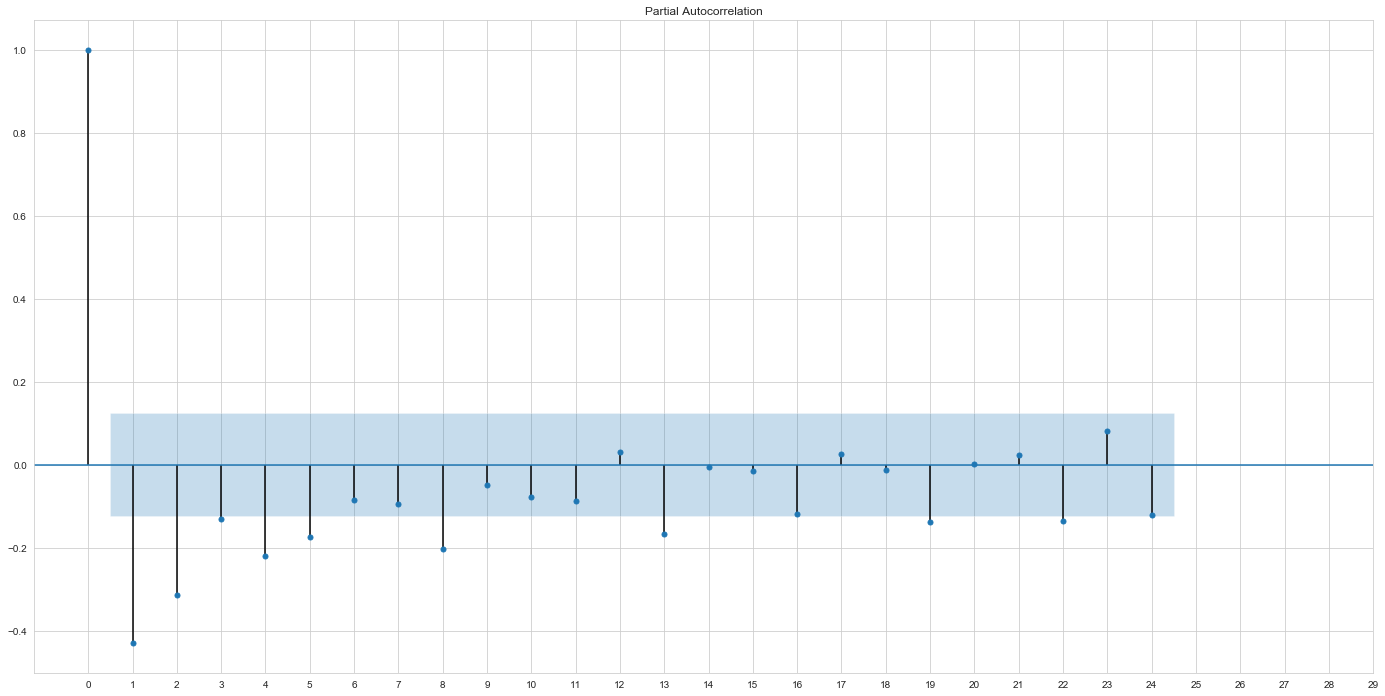

In [9]:
fig = plt.figure(figsize=(24,12))
ax = fig.subplots(1,1)
plot_pacf(m1_us_diff,alpha=0.05,zero=True,ax=ax)
ax.set_xticks(np.arange(0,30,1))

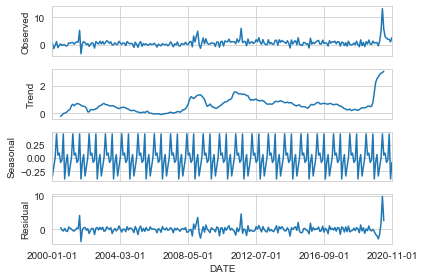

In [10]:
ax = seasonal.seasonal_decompose(df1_date, model='additive', freq=12).plot()

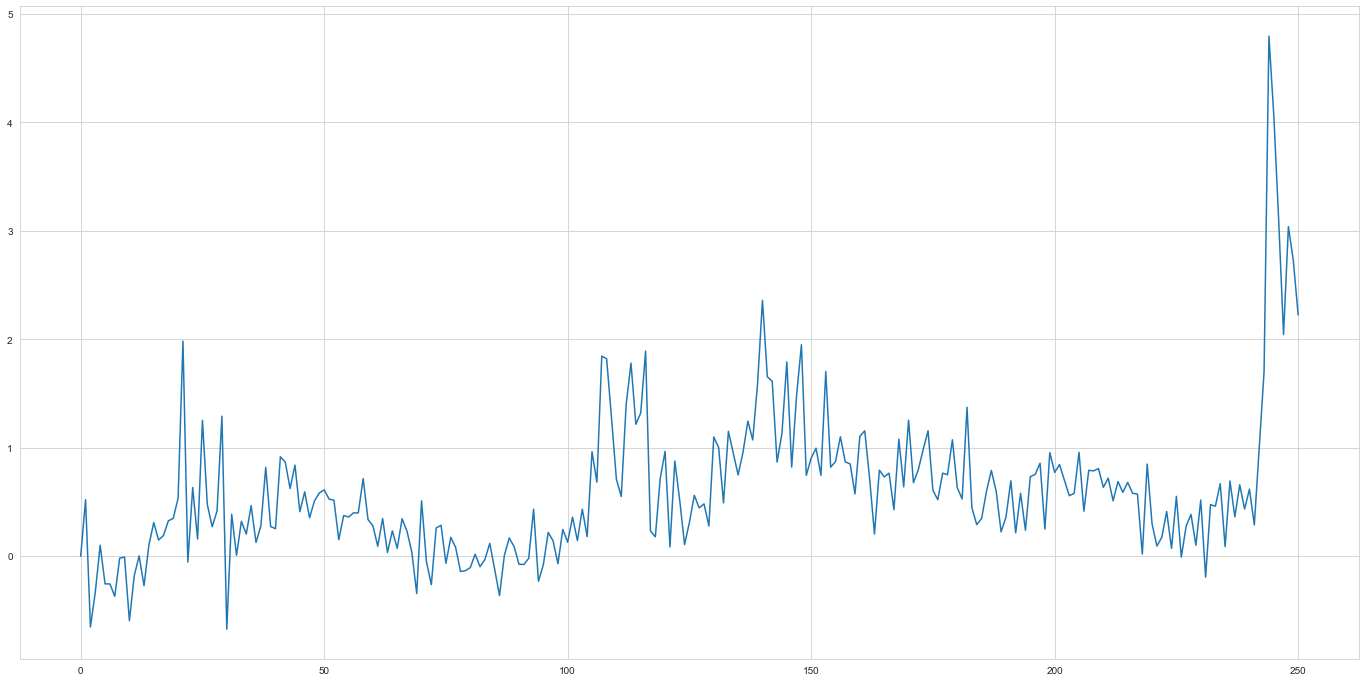

In [11]:
fig,ax = plt.subplots(1,1,figsize=(24,12))
m1_us_sarima = sarimax.SARIMAX(m1_us,order=(8,1,0,12))
m1_us_result = m1_us_sarima.fit()
m1_us_fit = m1_us_result.predict()

plt.plot(m1_us_fit)

In [12]:
m1_us_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                 M1_PCH   No. Observations:                  251
Model:               SARIMAX(8, 1, 0)   Log Likelihood                -413.317
Date:                Wed, 09 Dec 2020   AIC                            844.634
Time:                        11:50:09   BIC                            876.327
Sample:                             0   HQIC                           857.390
                                - 251                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7096      0.042    -16.778      0.000      -0.792      -0.627
ar.L2         -0.5932      0.076     -7.817      0.000      -0.742      -0.445
ar.L3         -0.4798      0.090     -5.346      0.000      -0.656      -0.304
ar.L4         -0.5185      0.134     -3.882      0.000      -0.780      -0.257
ar.L5         -0.4033      0.135     -2.996      0.003      -0.667      -0.139
ar.L6         -0.3189      0.135     -2.361      0.018      -0.584      -0.054
ar.L7         -0.3050      0.112     -2.715      0.007      -0.525      -0.085
ar.L8         -0.2533      0.085     -2.994      0.003      -0.419      -0.087
sigma2         1.5884      0.062     25.441      0.000       1.466       1.711
===================================================================================
Ljung-Box (Q):                       32.24   Jarque-Bera (JB):              8601.01
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               2.39   Skew:                             3.13
Prob(H) (two-sided):                  0.00   Kurtosis:                        31.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
residual_m1_us = m1_us_result.resid

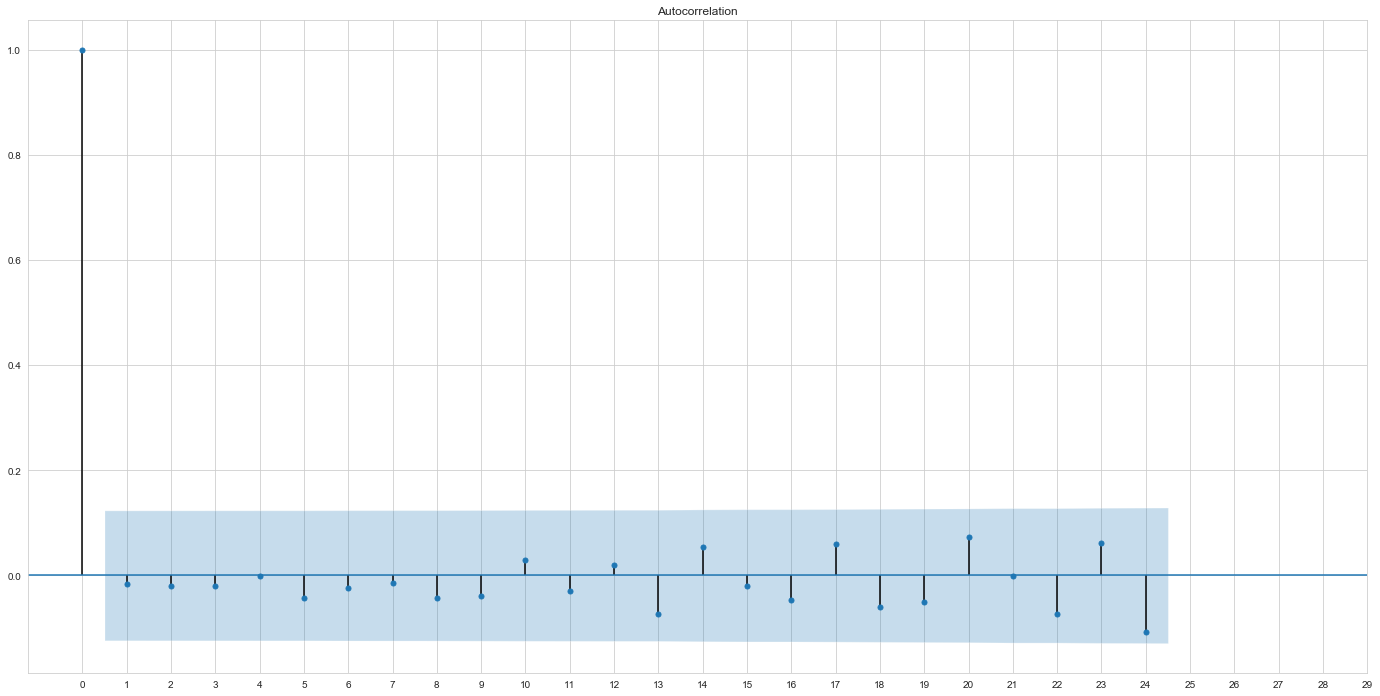

In [14]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(24,12))
ax = fig.subplots(1,1)
plot_acf(residual_m1_us,alpha=0.05,zero=True,ax=ax)
ax.set_xticks(np.arange(0,30,1))

Text(0.5, 1.0, 'Distribution of Residual')

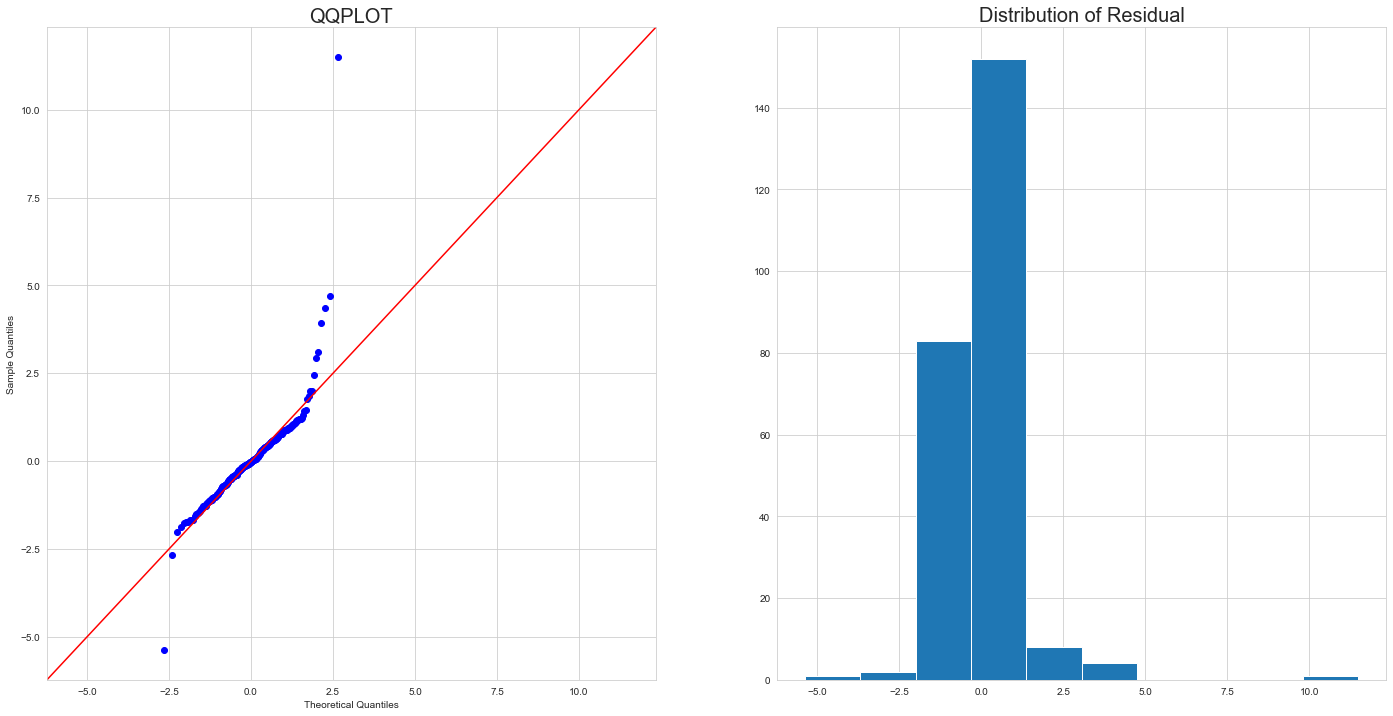

In [15]:
fig = plt.figure(figsize=(24,12))
ax = fig.subplots(1,2)
gofplots.qqplot(residual_m1_us,ax=ax[0],line="45")
ax[0].set_title("QQPLOT",fontsize=20)
ax[1].hist(residual_m1_us)
ax[1].set_title("Distribution of Residual",fontsize=20)

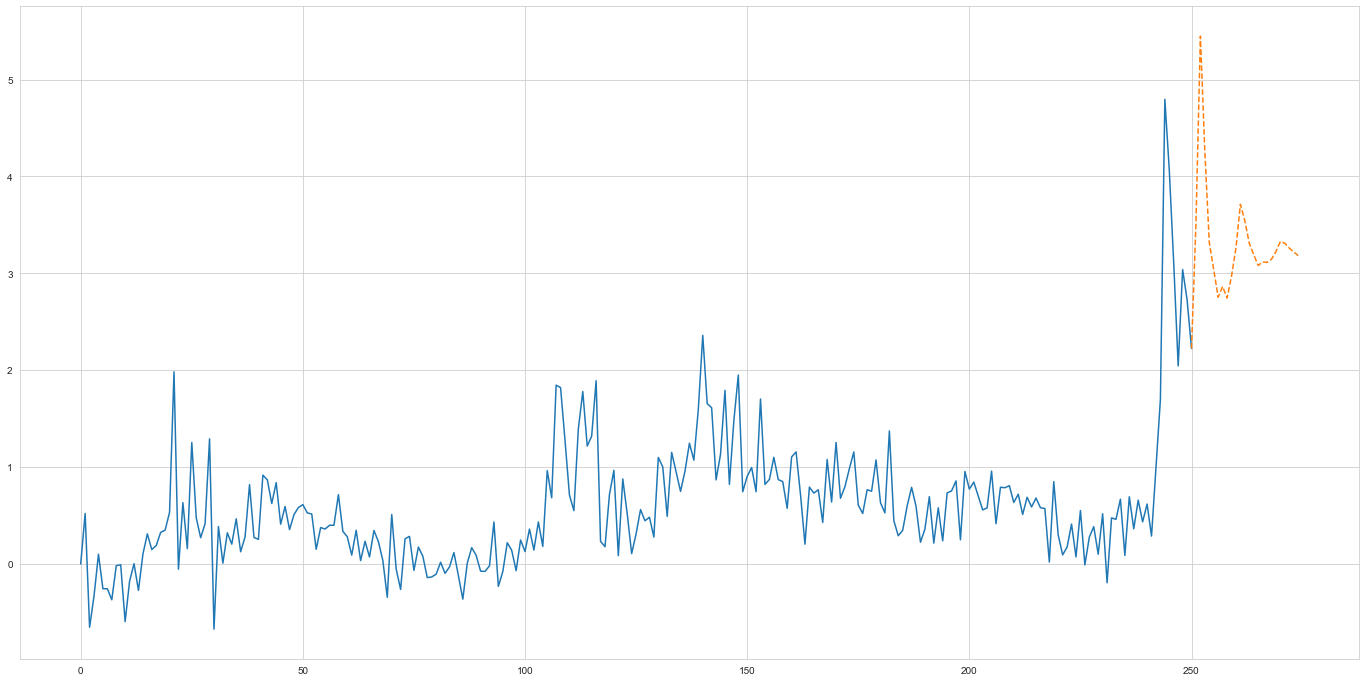

In [16]:
m1_us_pred = m1_us_result.predict(start=250,end=274)


fig = plt.figure(figsize=(24,12))
ax = fig.subplots(1,1)
ax = plt.plot(m1_us_fit)
ax = plt.plot(m1_us_pred,"--")

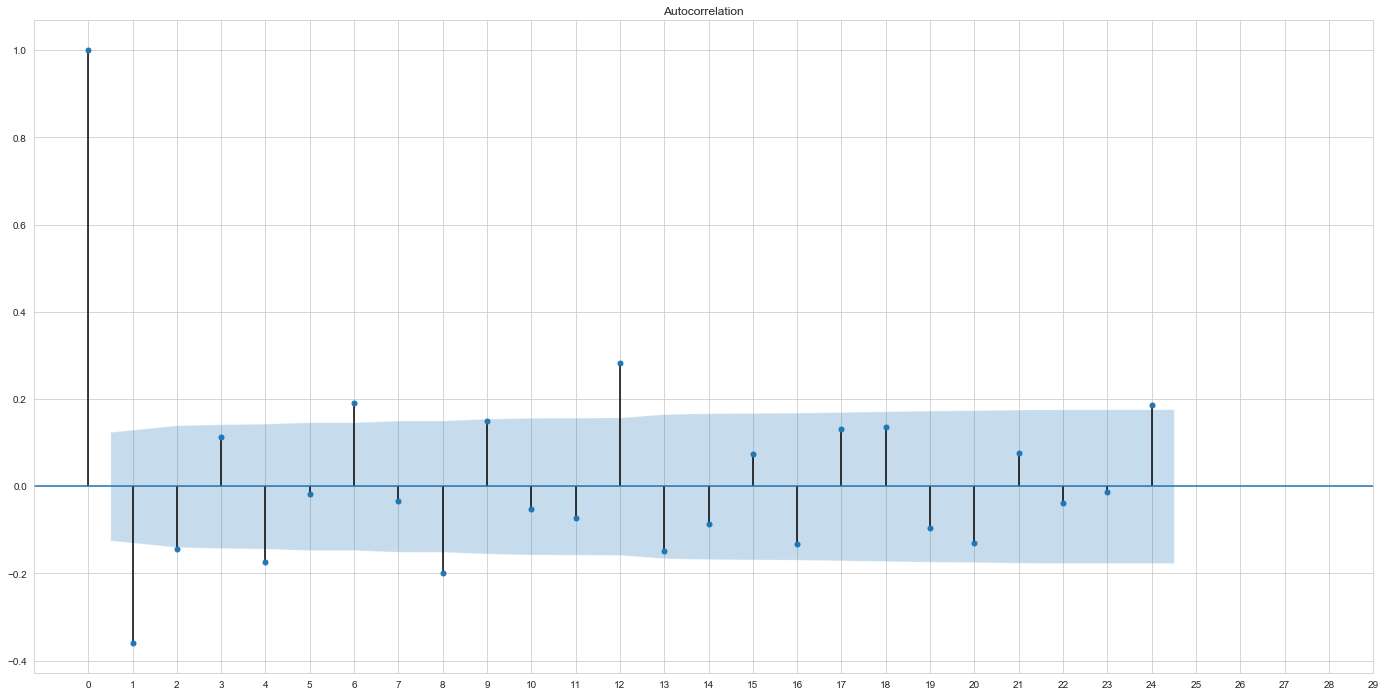

In [17]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(24,12))
ax = fig.subplots(1,1)
plot_acf(m1_kor_diff,alpha=0.05,zero=True,ax=ax)
ax.set_xticks(np.arange(0,30,1))

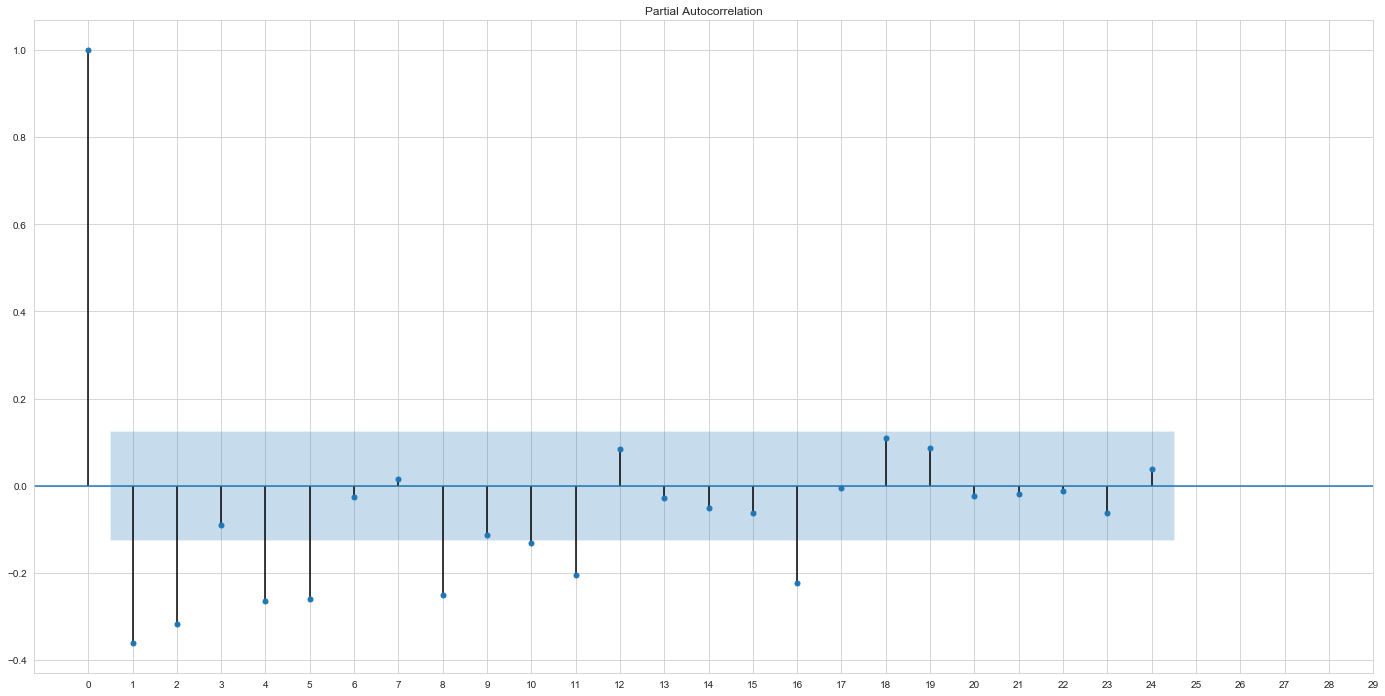

In [18]:
fig = plt.figure(figsize=(24,12))
ax = fig.subplots(1,1)
plot_pacf(m1_kor_diff,alpha=0.05,zero=True,ax=ax)
ax.set_xticks(np.arange(0,30,1))

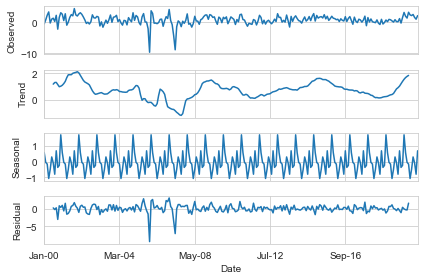

In [19]:
ax = seasonal.seasonal_decompose(df2_date, model='additive', freq=12).plot()

D:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


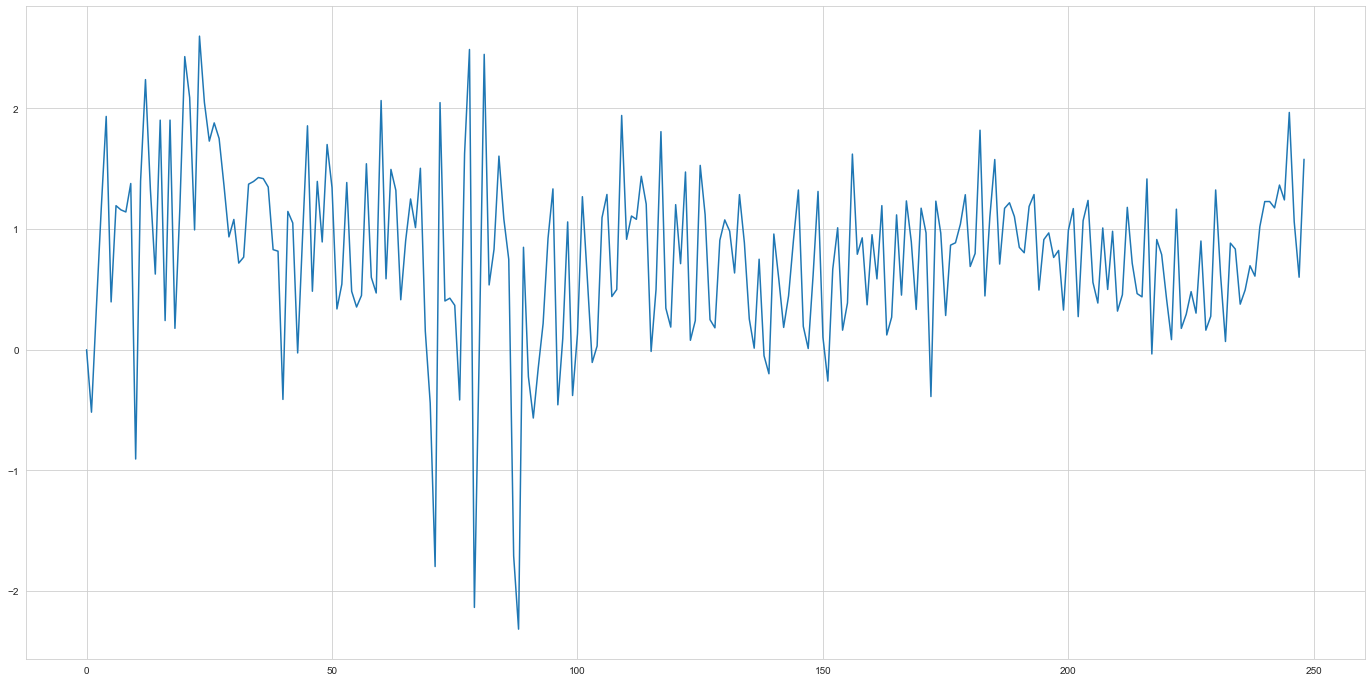

In [47]:
m1_kor_sarima =sarimax.SARIMAX(m1_kor,order=(0,1,12,12))
m1_kor_result = m1_kor_sarima.fit()
m1_kor_fit = m1_kor_result.predict()

fig = plt.figure(figsize=(24,12))
ax = fig.subplots(1,1)
ax = plt.plot(m1_kor_fit)

In [50]:
m1_kor_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:               P_change   No. Observations:                  249
Model:              SARIMAX(0, 1, 12)   Log Likelihood                -436.924
Date:                Wed, 09 Dec 2020   AIC                            899.848
Time:                        11:52:42   BIC                            945.522
Sample:                             0   HQIC                           918.235
                                - 249                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6584      1.319     -0.499      0.618      -3.243       1.926
ma.L2         -0.2491      0.466     -0.534      0.593      -1.163       0.665
ma.L3         -0.0272      0.176     -0.155      0.877      -0.372       0.318
ma.L4         -0.0687      0.126     -0.548      0.584      -0.315       0.177
ma.L5          0.0476      0.088      0.541      0.588      -0.125       0.220
ma.L6          0.1127      0.108      1.041      0.298      -0.100       0.325
ma.L7         -0.1329      0.235     -0.566      0.571      -0.593       0.327
ma.L8         -0.2430      0.089     -2.720      0.007      -0.418      -0.068
ma.L9          0.3171      0.306      1.038      0.299      -0.282       0.916
ma.L10         0.0386      0.162      0.238      0.812      -0.279       0.356
ma.L11        -0.2037      0.197     -1.035      0.300      -0.589       0.182
ma.L12         0.0675      0.101      0.671      0.502      -0.130       0.264
sigma2         1.9392      2.558      0.758      0.448      -3.075       6.954
===================================================================================
Ljung-Box (Q):                       47.79   Jarque-Bera (JB):              1154.84
Prob(Q):                              0.19   Prob(JB):                         0.00
Heteroskedasticity (H):               0.23   Skew:                            -1.57
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [51]:
residual_m1_kor = m1_kor_result.resid

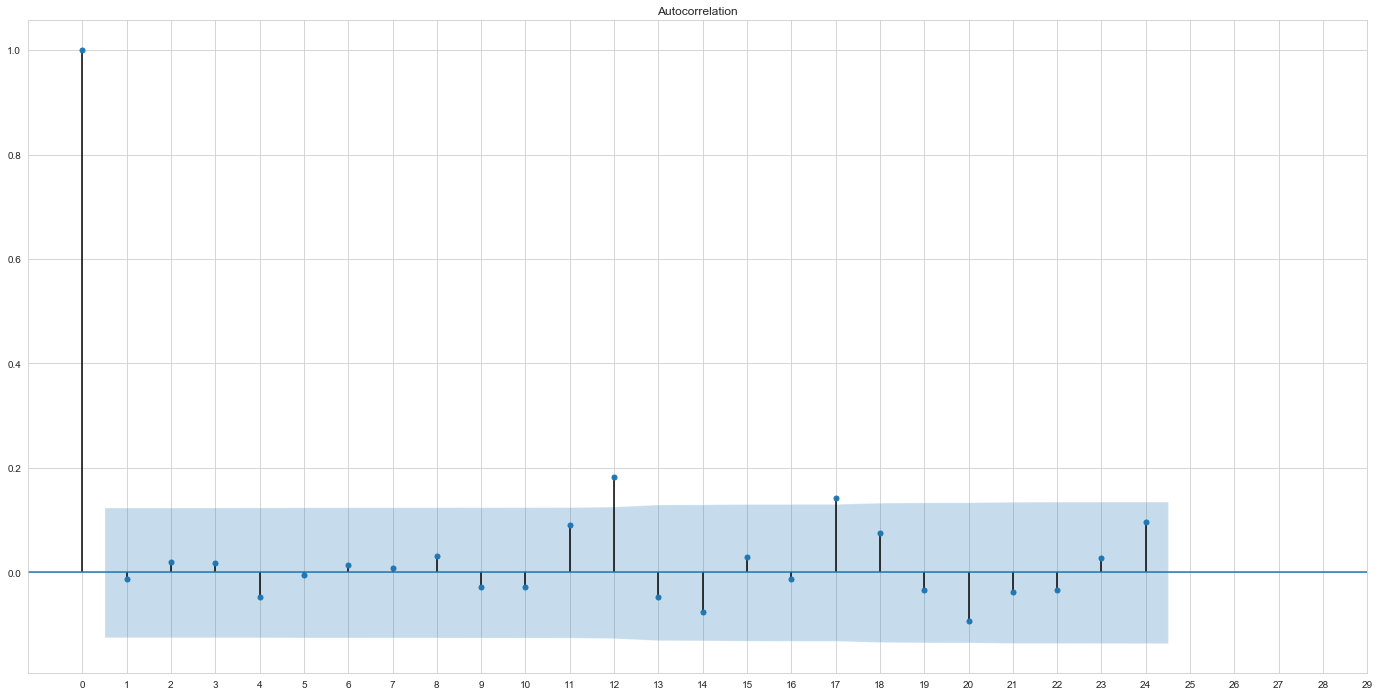

In [52]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(24,12))
ax = fig.subplots(1,1)
plot_acf(residual_m1_kor,alpha=0.05,zero=True,ax=ax)
ax.set_xticks(np.arange(0,30,1))

Text(0.5, 1.0, 'Distribution of Residual')

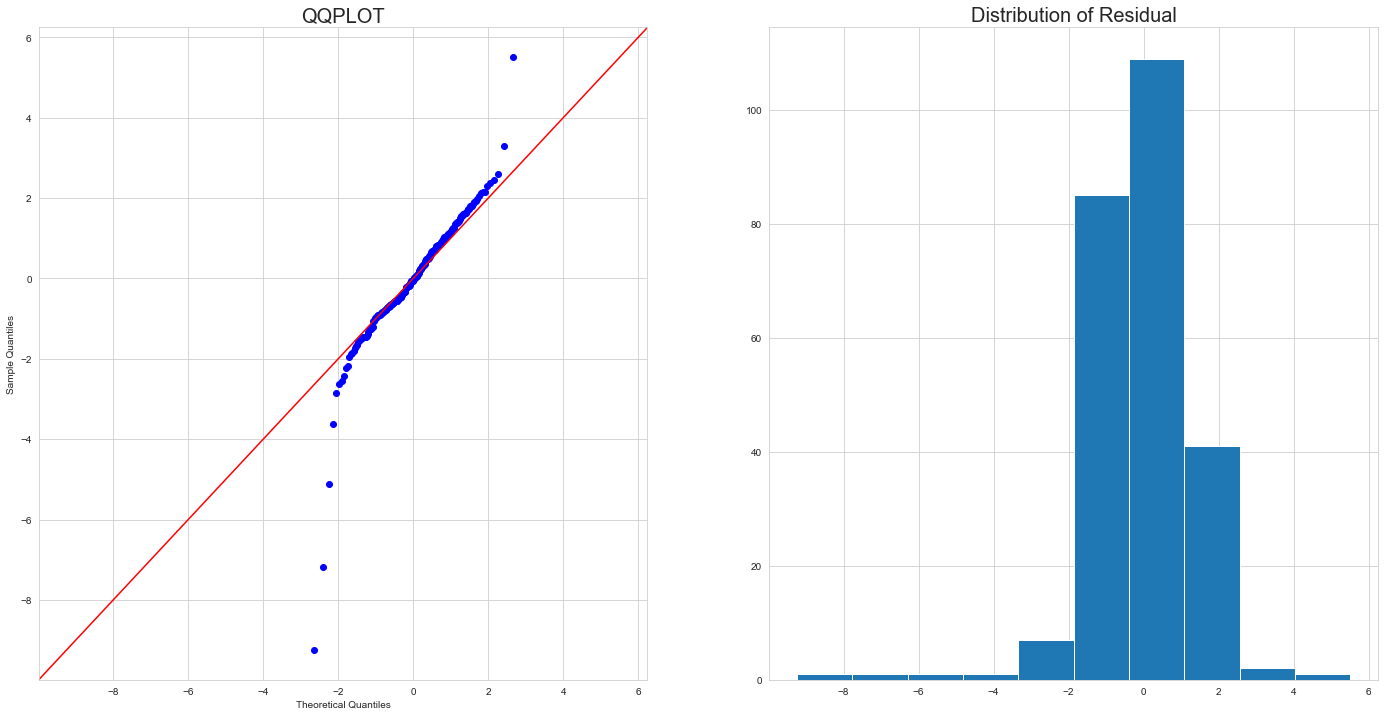

In [53]:
fig = plt.figure(figsize=(24,12))
ax = fig.subplots(1,2)
gofplots.qqplot(residual_m1_kor,ax=ax[0],line="45")
ax[0].set_title("QQPLOT",fontsize=20)
ax[1].hist(residual_m1_kor)
ax[1].set_title("Distribution of Residual",fontsize=20)

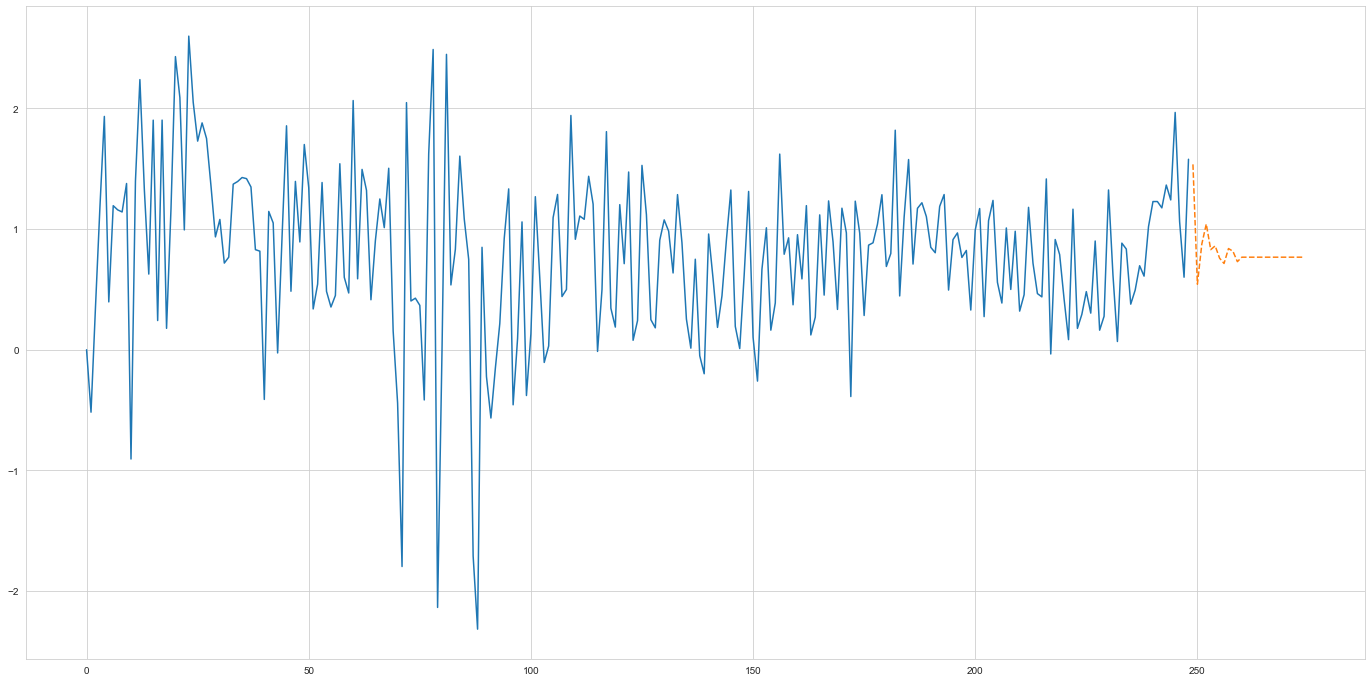

In [58]:
m1_kor_pred = m1_kor_result.predict(start=249,end=274)


fig = plt.figure(figsize=(24,12))
ax = fig.subplots(1,1)
ax = plt.plot(m1_kor_fit)
ax = plt.plot(m1_kor_pred,"--")

In [26]:
df3 = pd.read_csv(r"C:\Users\Choi\Desktop\Dataset\Time_project\KOR\GE.csv")
df4 = pd.read_csv(r"C:\Users\Choi\Desktop\Dataset\Time_project\USA\GE.csv")
ge_kor = df3["P_change"]
ge_us = df4["P_change"]

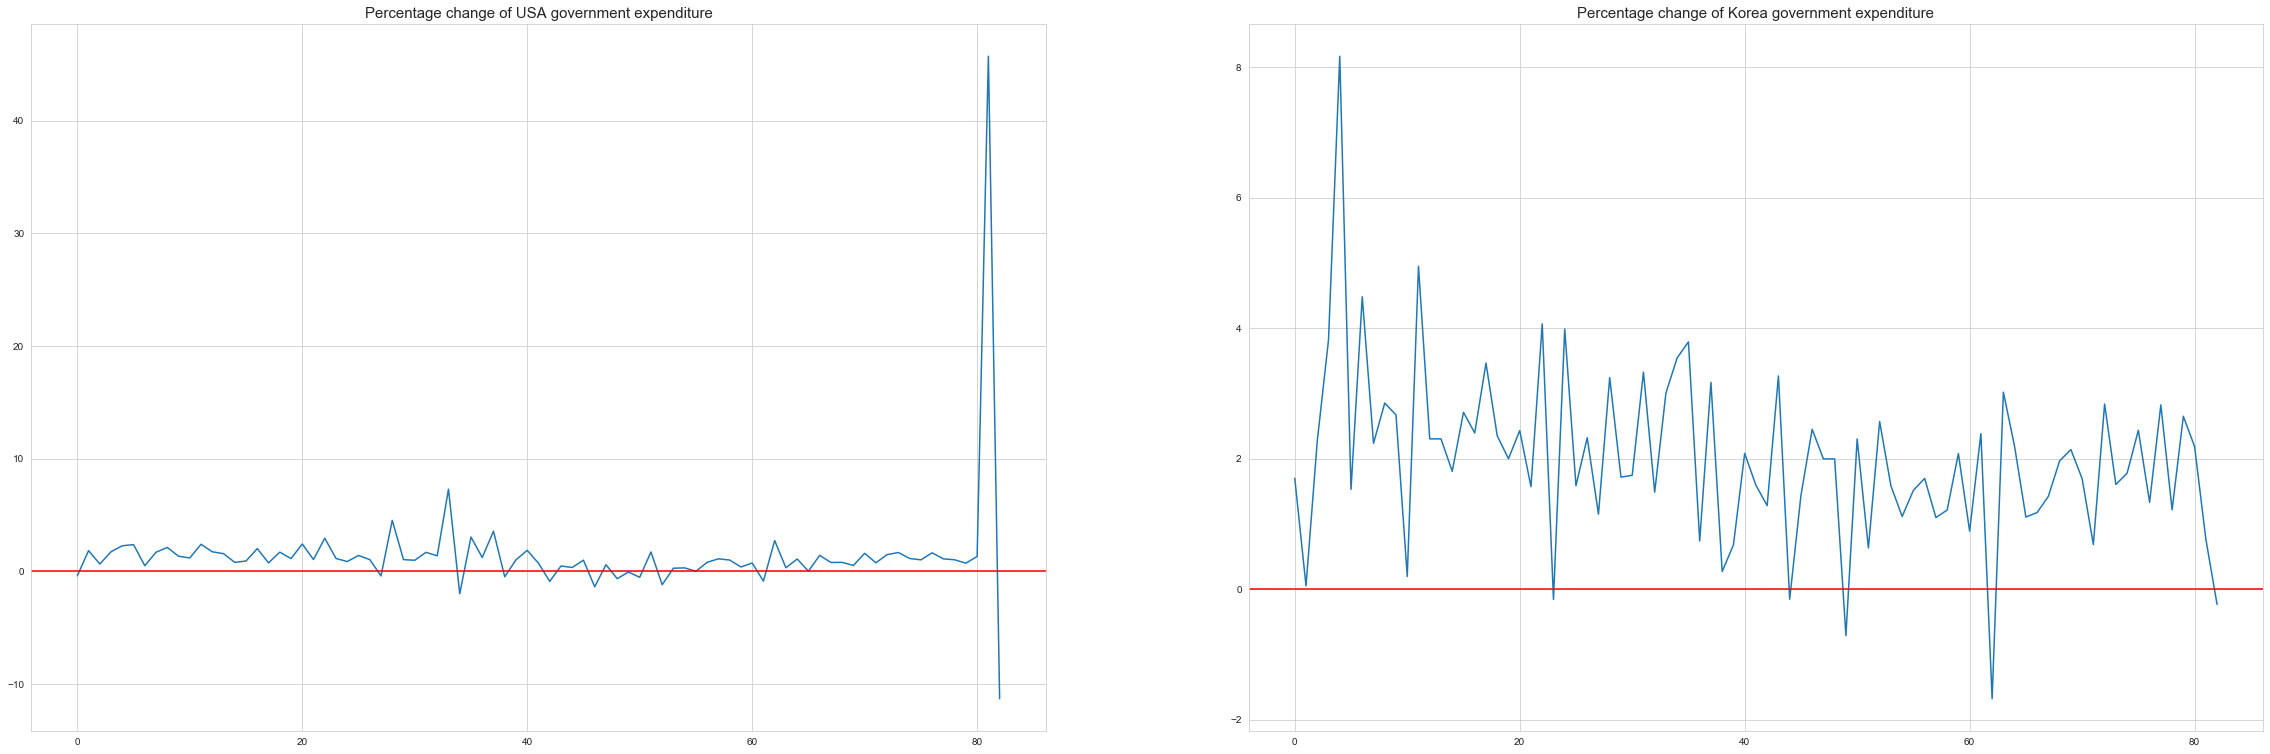

In [27]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(40,13))

ax = fig.subplots(1,2)
ax[0].plot(ge_us)
ax[0].set_title("Percentage change of USA government expenditure",fontsize=15)
ax[0].axhline(y=0, color='r')
ax[1].plot(ge_kor)
ax[1].set_title("Percentage change of Korea government expenditure",fontsize=15)
ax[1].axhline(y=0, color='r')

In [28]:
ge_kor_diff = ge_kor.diff(periods=1)[1:]
ge_us_diff = ge_us.diff(periods=1)[1:]

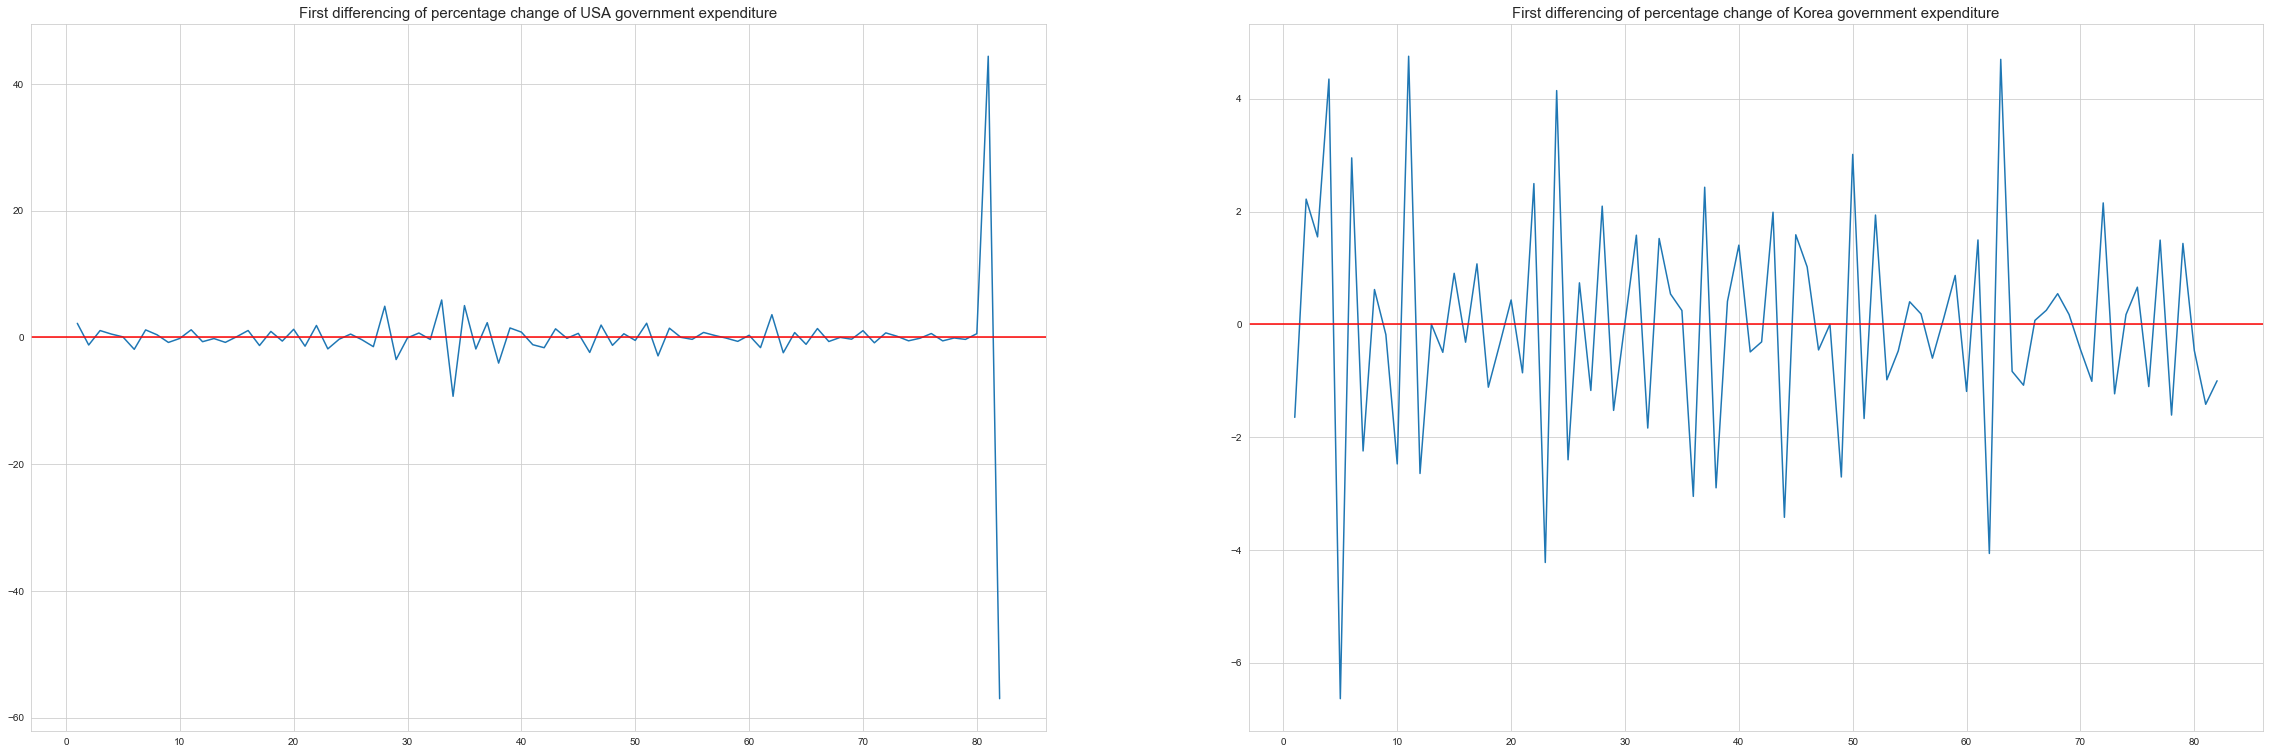

In [29]:
fig = plt.figure(figsize=(40,13))

ax = fig.subplots(1,2)
ax[0].plot(ge_us_diff)
ax[0].set_title("First differencing of percentage change of USA government expenditure",fontsize=15)
ax[0].axhline(y=0, color='r')
ax[1].plot(ge_kor_diff)
ax[1].set_title("First differencing of percentage change of Korea government expenditure",fontsize=15)
ax[1].axhline(y=0, color='r')

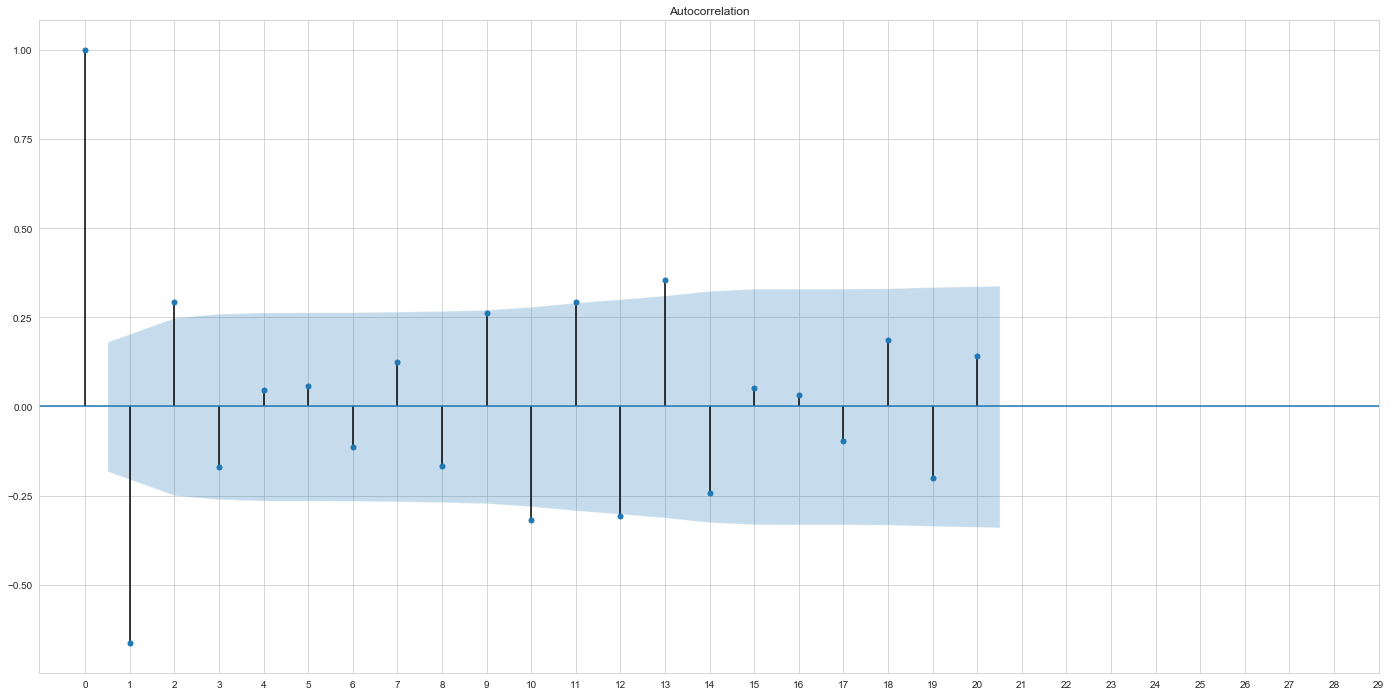

In [30]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(24,12))
ax = fig.subplots(1,1)
plot_acf(ge_kor_diff,alpha=0.1,zero=True,ax=ax)
ax.set_xticks(np.arange(0,30,1))

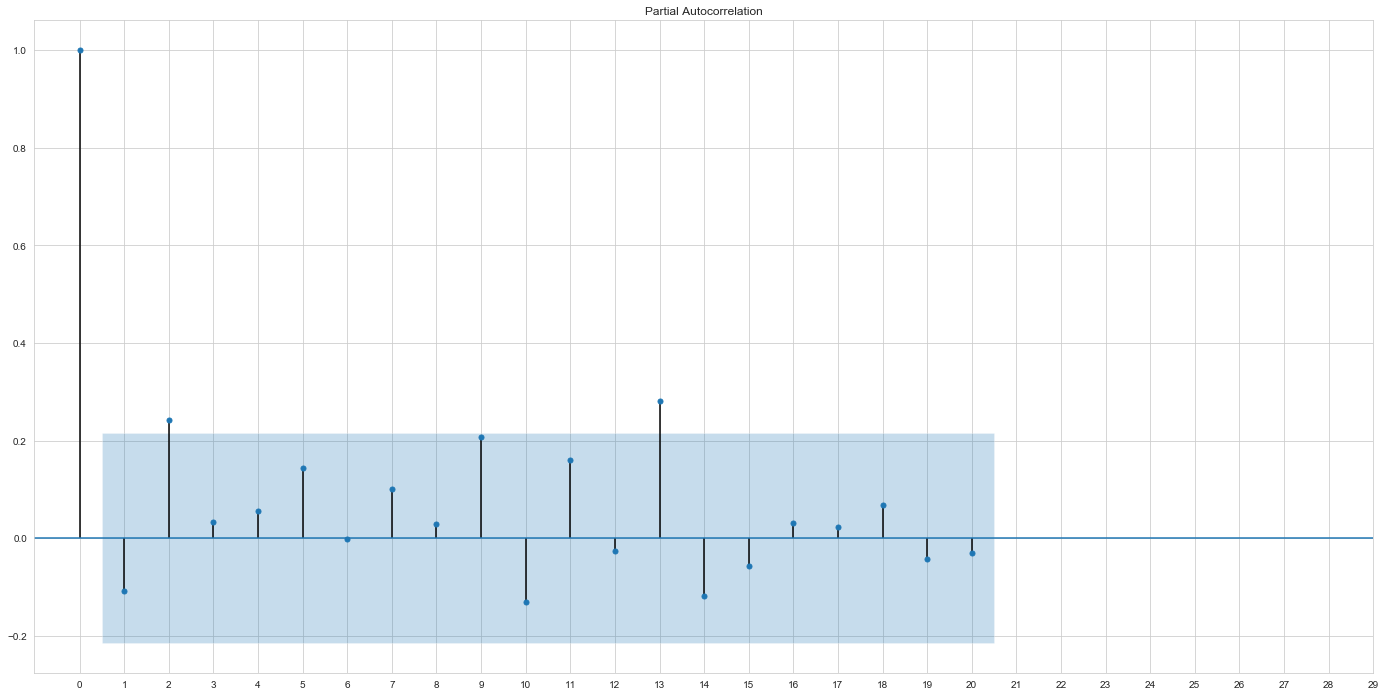

In [31]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(24,12))
ax = fig.subplots(1,1)
plot_pacf(ge_kor,alpha=0.05,zero=True,ax=ax)
ax.set_xticks(np.arange(0,30,1))

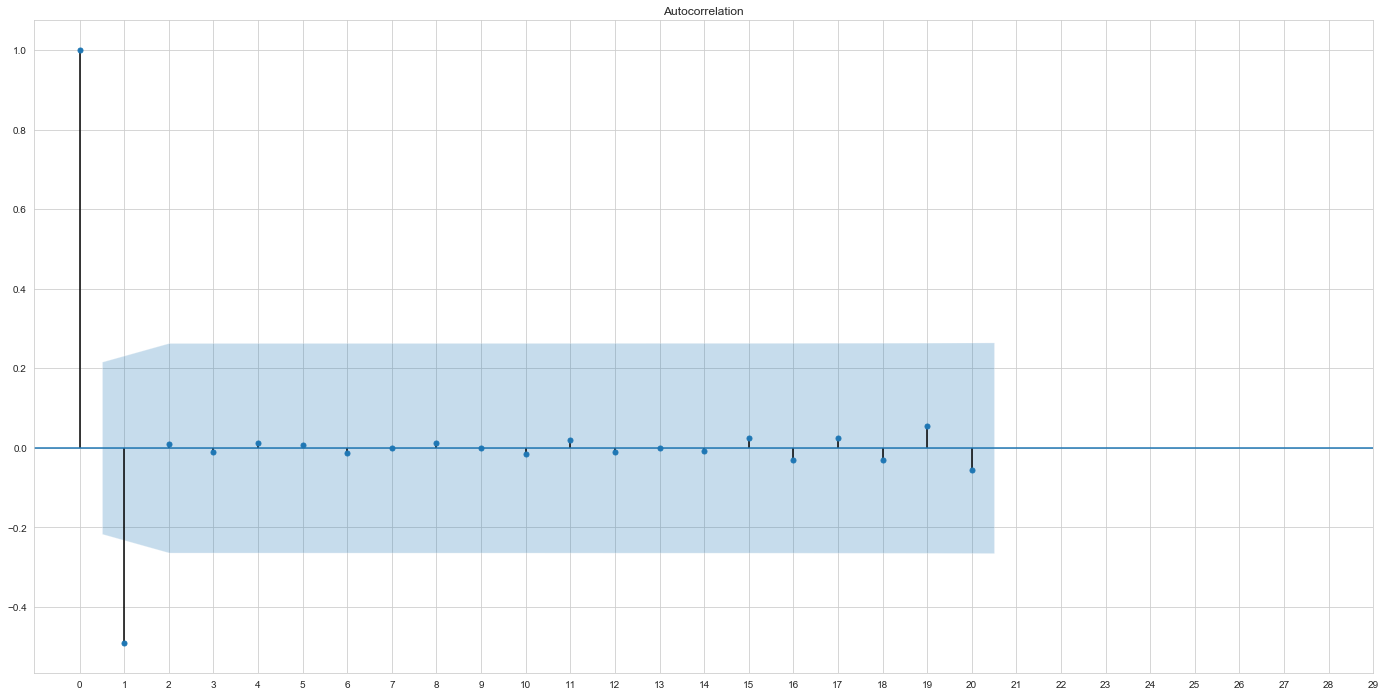

In [32]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(24,12))
ax = fig.subplots(1,1)
plot_acf(ge_us_diff,alpha=0.05,zero=True,ax=ax)
ax.set_xticks(np.arange(0,30,1))

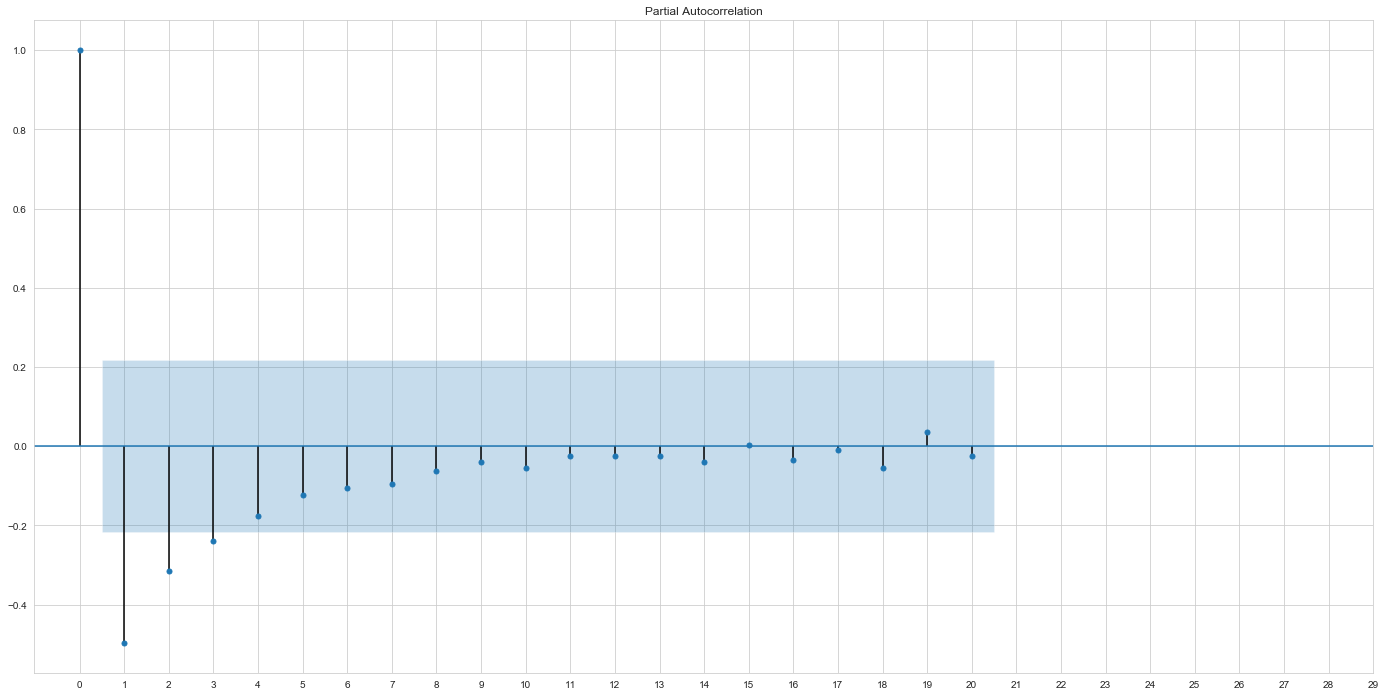

In [33]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(24,12))
ax = fig.subplots(1,1)
plot_pacf(ge_us_diff,alpha=0.05,zero=True,ax=ax)
ax.set_xticks(np.arange(0,30,1))

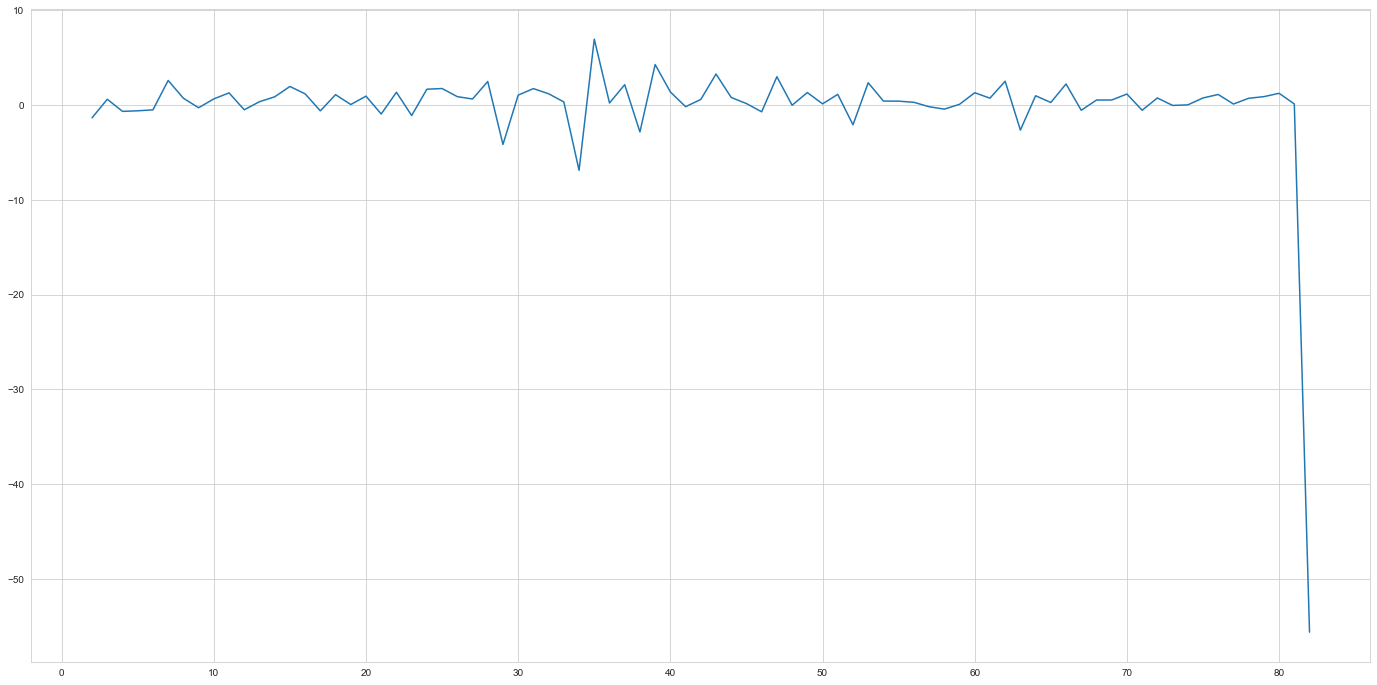

In [34]:
fig,ax = plt.subplots(1,1,figsize=(24,12))
ge_us_arima = ARIMA(ge_us,order=(3,1,0))
ge_us_result = ge_us_arima.fit()
ge_us_fit = ge_us_result.predict()

plt.plot(ge_us_fit)

In [35]:
ge_us_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:             D.P_change   No. Observations:                   82
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -250.038
Method:                       css-mle   S.D. of innovations              5.049
Date:                Wed, 09 Dec 2020   AIC                            510.076
Time:                        11:50:15   BIC                            522.109
Sample:                             1   HQIC                           514.907
                                                                              
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1555      0.160      0.974      0.333      -0.157       0.468
ar.L1.D.P_change    -1.2566      0.109    -11.530      0.000      -1.470      -1.043
ar.L2.D.P_change    -0.9126      0.310     -2.947      0.004      -1.519      -0.306
ar.L3.D.P_change    -0.4206      0.294     -1.431      0.156      -0.997       0.156
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.2847           -0.0000j            1.2847           -0.5000
AR.2           -0.4425           -1.2864j            1.3604           -0.3027
AR.3           -0.4425           +1.2864j            1.3604            0.3027
-----------------------------------------------------------------------------
"""

In [36]:
residual_ge_us = ge_us_result.resid

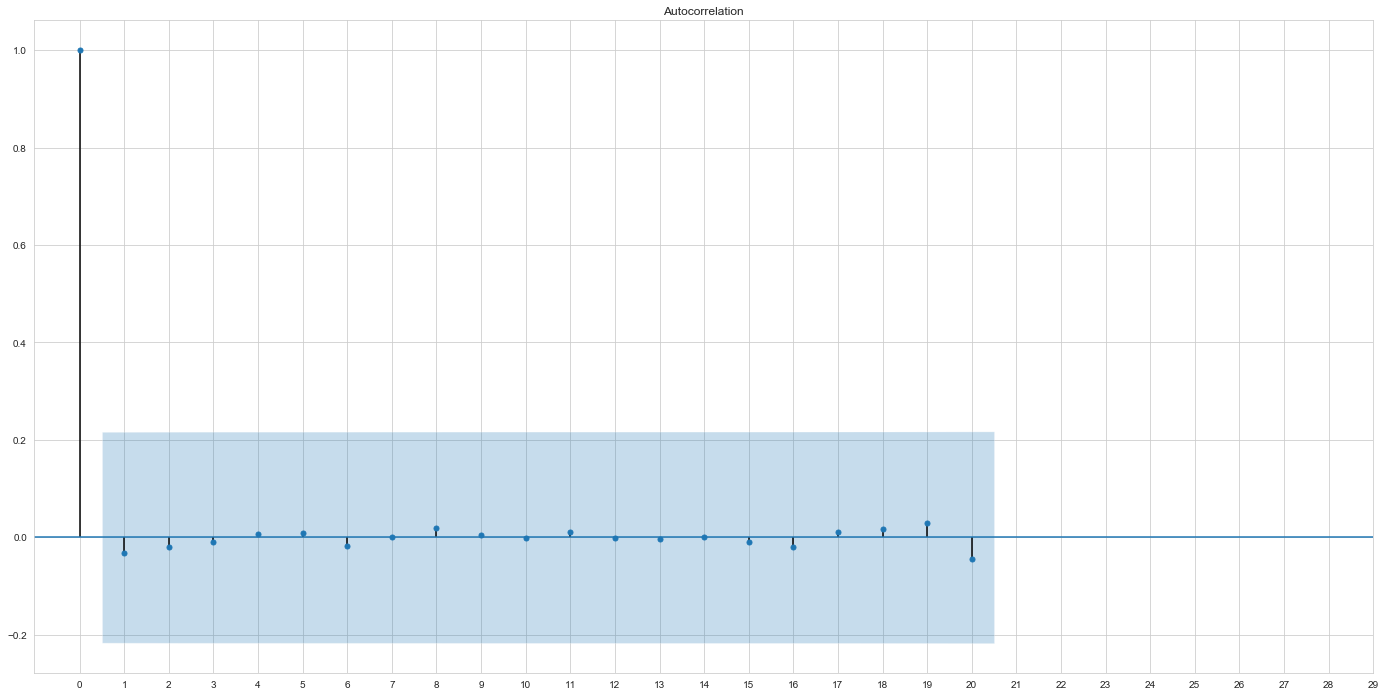

In [37]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(24,12))
ax = fig.subplots(1,1)
plot_acf(residual_ge_us,alpha=0.05,zero=True,ax=ax)
ax.set_xticks(np.arange(0,30,1))

Text(0.5, 1.0, 'Distribution of Residual')

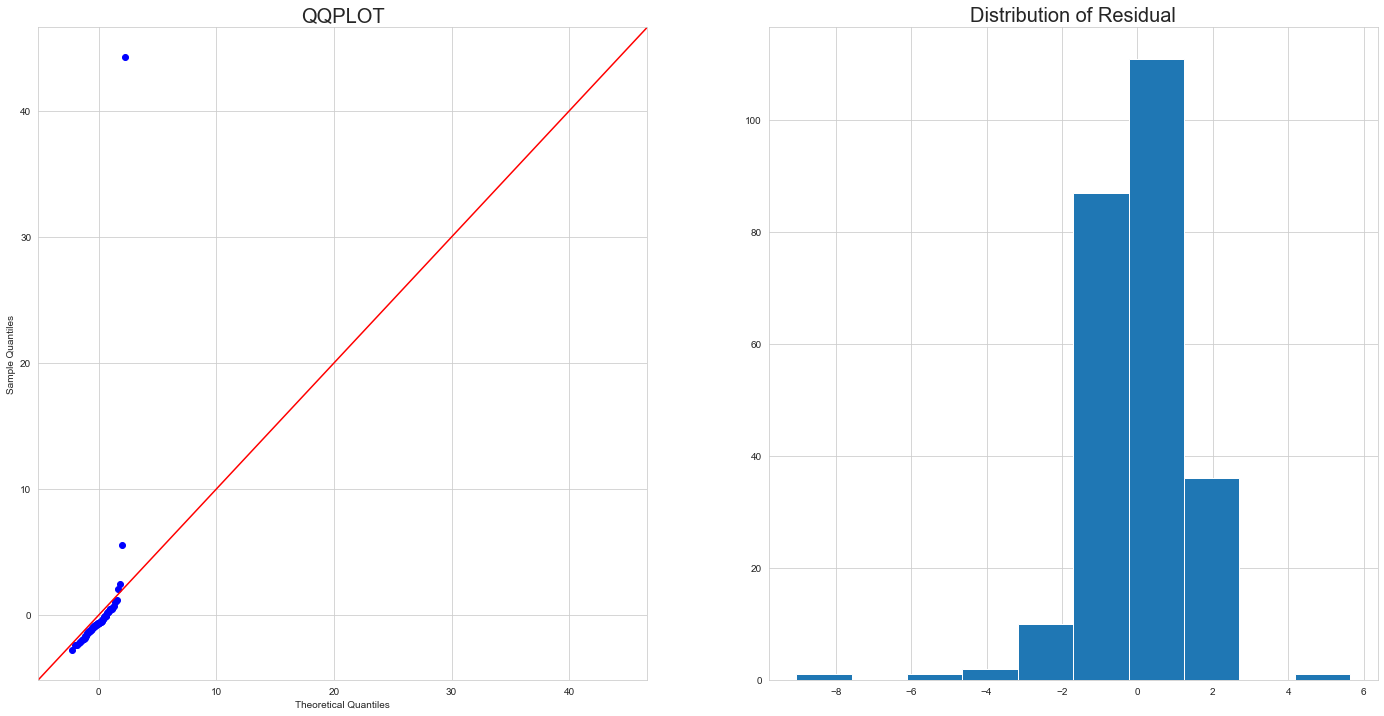

In [38]:
fig = plt.figure(figsize=(24,12))
ax = fig.subplots(1,2)
gofplots.qqplot(residual_ge_us,ax=ax[0],line="45")
ax[0].set_title("QQPLOT",fontsize=20)
ax[1].hist(residual_m1_kor)
ax[1].set_title("Distribution of Residual",fontsize=20)

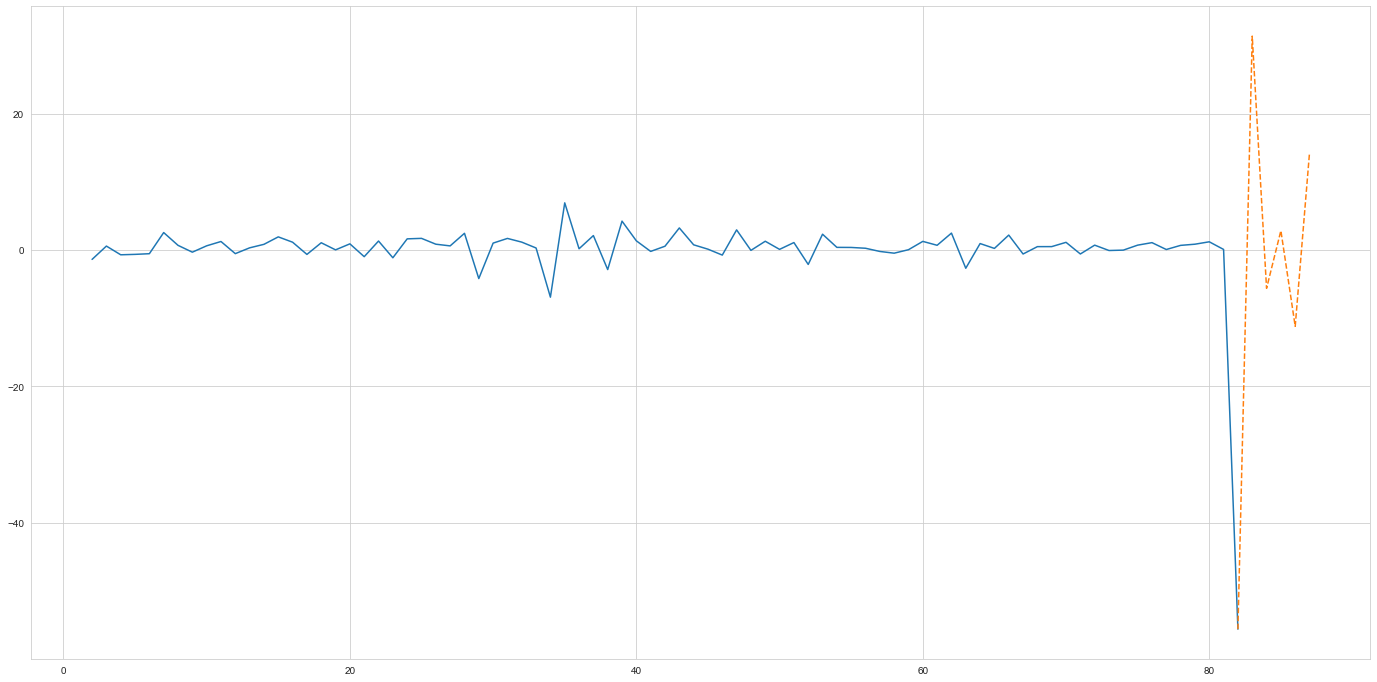

In [39]:
ge_us_pred = ge_us_result.predict(start=82,end=87)


fig = plt.figure(figsize=(24,12))
ax = fig.subplots(1,1)
ax = plt.plot(ge_us_fit)
ax = plt.plot(ge_us_pred,"--")

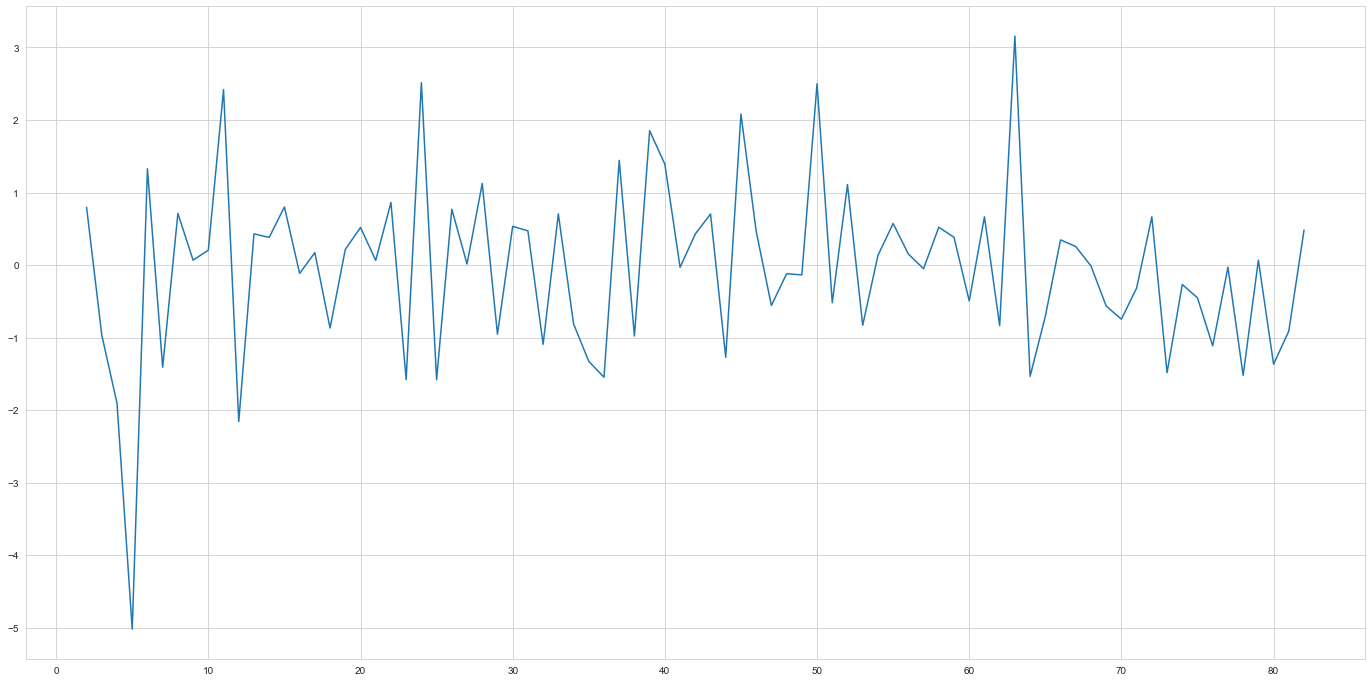

In [40]:
fig,ax = plt.subplots(1,1,figsize=(24,12))
ge_kor_arima = ARIMA(ge_kor,order=(0,1,1))
ge_kor_result = ge_kor_arima.fit()
ge_kor_fit = ge_kor_result.predict()

plt.plot(ge_kor_fit)

In [41]:
ge_kor_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:             D.P_change   No. Observations:                   82
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -138.432
Method:                       css-mle   S.D. of innovations              1.274
Date:                Wed, 09 Dec 2020   AIC                            282.864
Time:                        11:50:17   BIC                            290.085
Sample:                             1   HQIC                           285.763
                                                                              
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0185      0.006     -3.177      0.002      -0.030      -0.007
ma.L1.D.P_change    -1.0000      0.038    -26.066      0.000      -1.075      -0.925
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [42]:
residual_ge_kor = ge_kor_result.resid

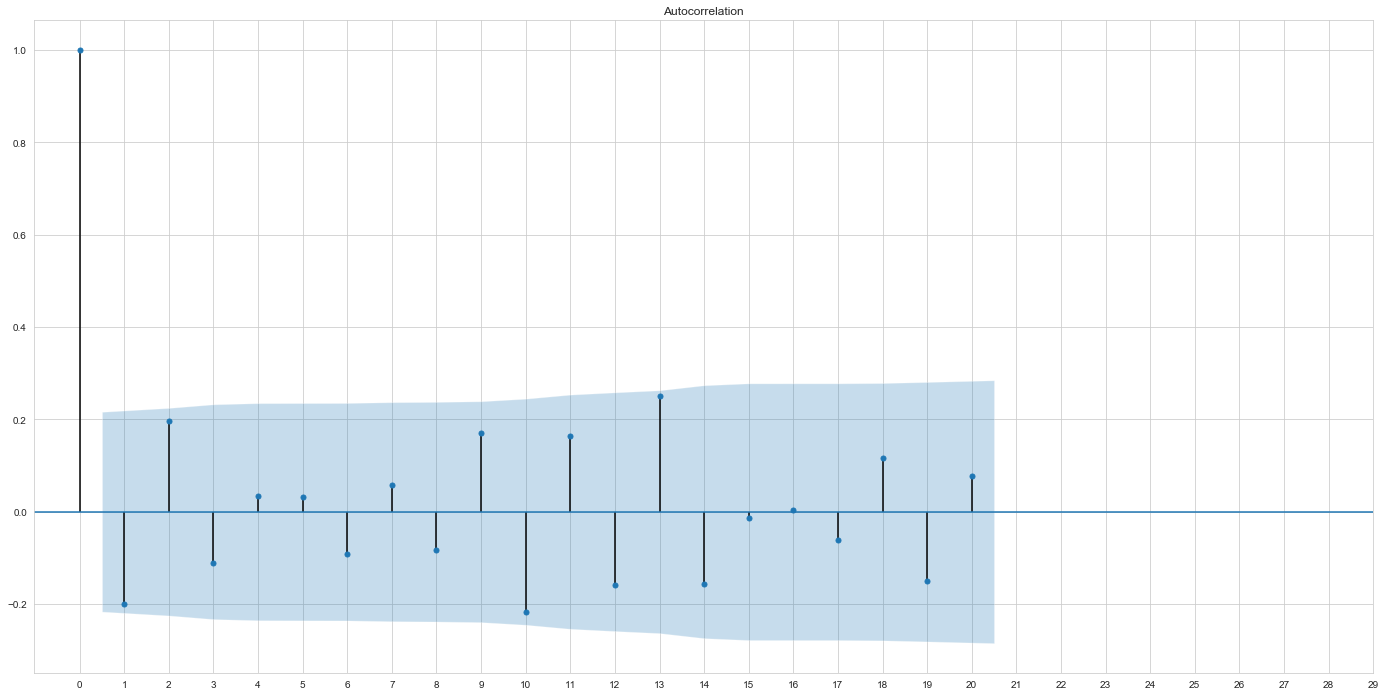

In [43]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(24,12))
ax = fig.subplots(1,1)
plot_acf(residual_ge_kor,alpha=0.05,zero=True,ax=ax)
ax.set_xticks(np.arange(0,30,1))

Text(0.5, 1.0, 'Distribution of Residual')

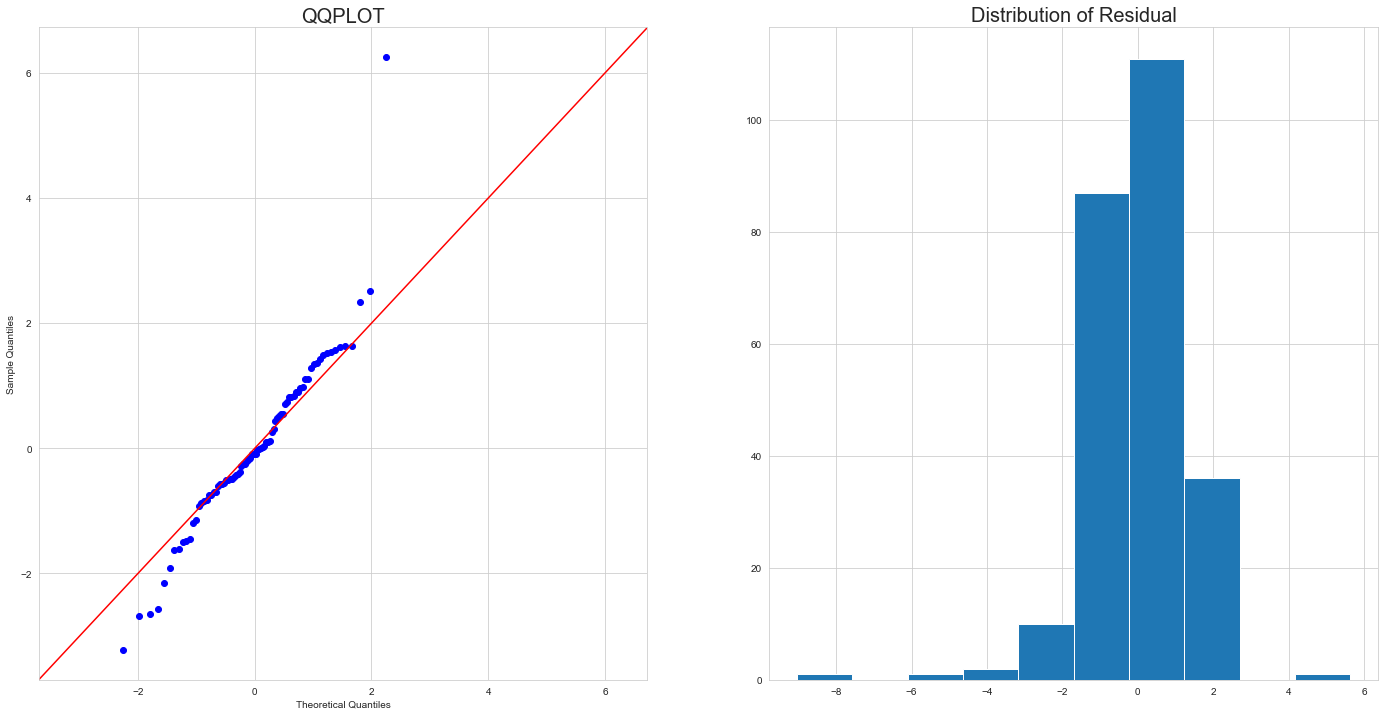

In [44]:
fig = plt.figure(figsize=(24,12))
ax = fig.subplots(1,2)
gofplots.qqplot(residual_ge_kor,ax=ax[0],line="45")
ax[0].set_title("QQPLOT",fontsize=20)
ax[1].hist(residual_m1_kor)
ax[1].set_title("Distribution of Residual",fontsize=20)

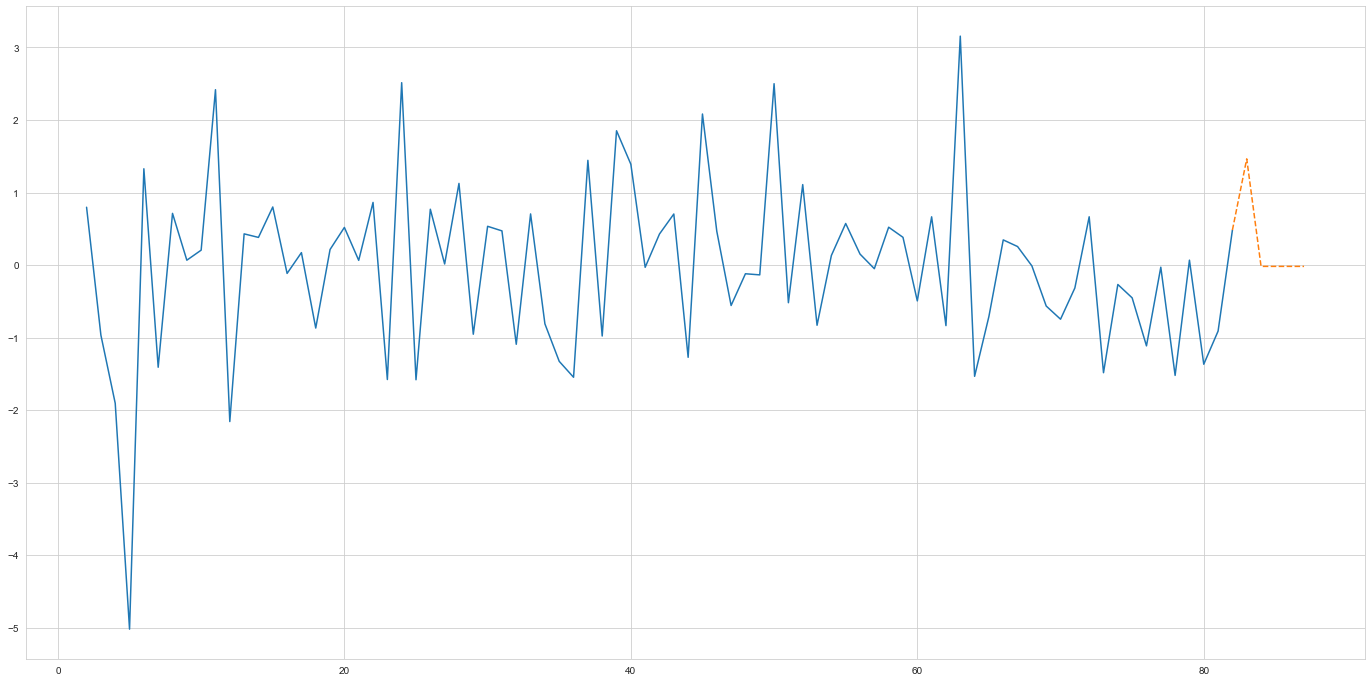

In [45]:
ge_kor_pred = ge_kor_result.predict(start=82,end=87)


fig = plt.figure(figsize=(24,12))
ax = fig.subplots(1,1)
ax = plt.plot(ge_kor_fit)
ax = plt.plot(ge_kor_pred,"--")